In [14]:
from scipy.io import loadmat
# /mnt/c/Users/Sabrina/Desktop/Spring2021UVA/graphs-proj
file = "C:\\Users\\Sabrina\\Desktop\\Spring2021UVA\\graphs-proj\\EEG-MRI-graph-construction\\correlation\\sub-xp101\\eegfmriNF.mat"
import pandas as pd
import numpy as np
from os.path import dirname, join as pjoin
import scipy.io as sio
from networkx.algorithms import community 
import networkx
import numpy as np
import matplotlib.pyplot as plt


In [6]:
class graph_measures:
    def __init__(self,threshold):
        self.threshold = threshold
        self.avg_node_connect = None
        return
    
    def get_eigenvector_centrality(self,G):
        return networkx.eigenvector_centrality(G)
    
    def get_betweenness_centrality (self, G):
        return networkx.betweenness_centrality(G)
        
    def get_node_avg (self, G):
        return networkx.average_node_connectivity(G)
    
    def get_comm_central(self, G):
        return (networkx.community.girvan_newman(G))
                
    def get_adj_threshold(self,adj_mat):
        adj_mat[adj_mat <= self.threshold] = 0
        adj_mat[adj_mat > self.threshold] = 1
        return adj_mat
        
    def get_graphs(self, g_type):
        base_name = "C:\\Users\\Sabrina\\Desktop\\Spring2021UVA\\graphs-proj\\EEG-MRI-graph-construction\\correlation\\"
        graph_list1 = []
        graph_list2 = []
        user = "sub-xp"
        graph_type = ["\\eegNF.mat","\\fmriNF.mat" ,"\\eegfmriNF.mat", "\\motorloc.mat"]
        for i in range(0,10):
            file = base_name+user+str(i+101)+graph_type[g_type]
            mat_contents = sio.loadmat(file)
            adj_mat = np.array(mat_contents["rho"])
            adj_mat = self.get_adj_threshold(adj_mat)
            G = networkx.convert_matrix.from_numpy_matrix(adj_mat)
            graph_list1.append(G) 
        return graph_list1


In [8]:
g = graph_measures(0.75)

In [10]:
graph_list = g.get_graphs(0)
plt.bar(t.keys(), t.values(), color='g')

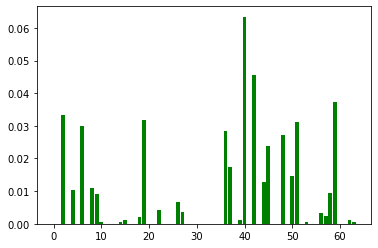

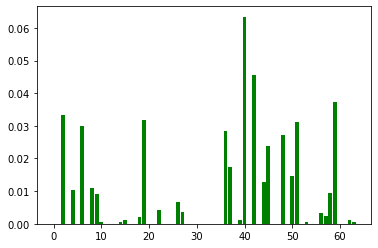

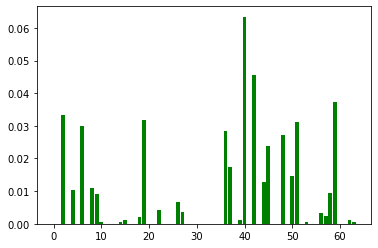

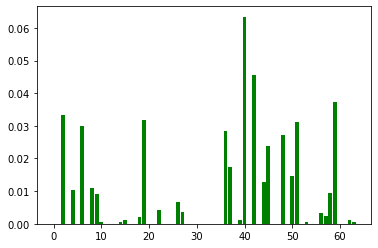

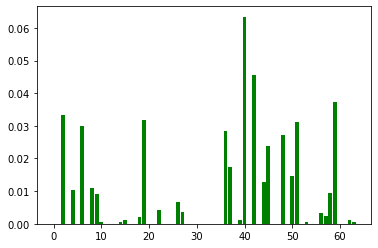

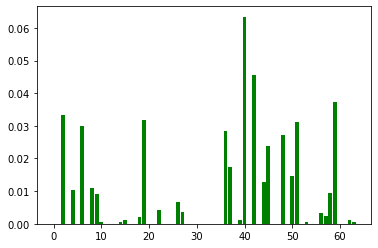

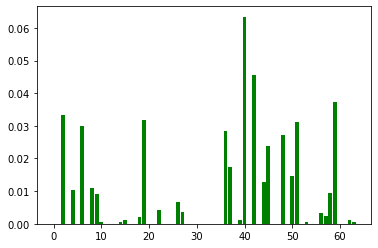

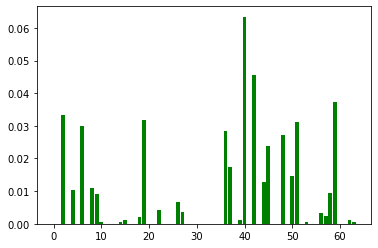

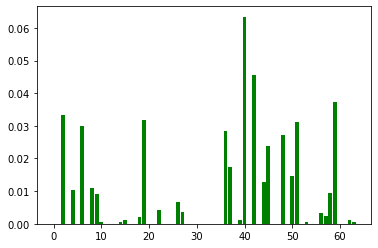

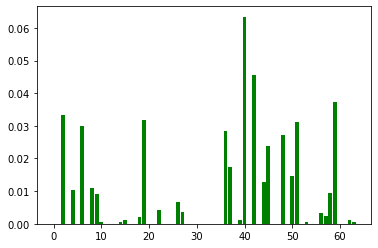

In [17]:
t = g.get_betweenness_centrality(graph_list[0])
for graph in graph_list: 
    d = g.get_betweenness_centrality(graph)
    plt.bar(t.keys(), t.values(), color='g')
    plt.show()

<BarContainer object of 64 artists>

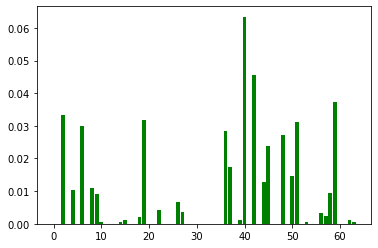